In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Normalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
def loadData():
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1, 2)
    X[:, 1] = X[:, 1] * 4 + 11.5          # 12-15 min is best
    X[:, 0] = X[:, 0] * (285 - 150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3 / (260 - 175) * t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d <= y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1, 1))

In [3]:
def plotData(x, y):
    y = y.reshape(-1,)
    pos = y == 1
    neg = y == 0
    
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x[pos, 0], x[pos, 1], marker = 'o', c = 'blue', label = "Good Roast")
    ax.scatter(x[neg, 0], x[neg, 1], marker = 'x', c = 'red', label = "Bad Roast")
    ax.set_title(f"Coffee Roasting")
    ax.set_xlabel("Temperature \n(Celsius)")
    ax.set_ylabel("Duration \n(minutes)")
    ax.legend(loc = 'upper right')
    return ax

<Axes: title={'center': 'Coffee Roasting'}, xlabel='Temperature \n(Celsius)', ylabel='Duration \n(minutes)'>

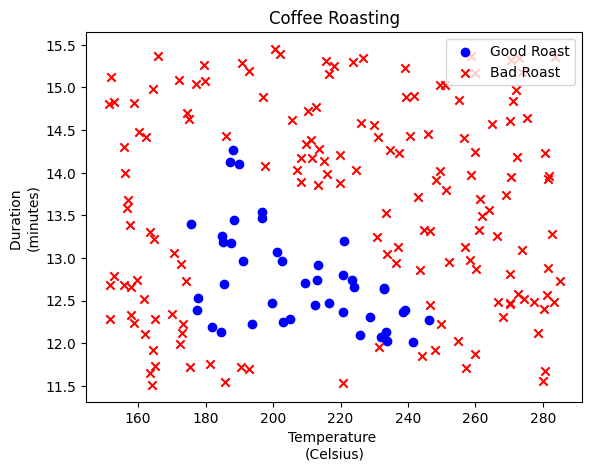

In [4]:
x, y = loadData()
plotData(x, y)

In [5]:
tf.random.set_seed(1234)

norm = Normalization(axis = -1)
norm.adapt(x)
x = norm(x)

x = np.tile(x, (1000, 1))
y = np.tile(y, (1000, 1))   

model = Sequential([
    Input((2, )),
    Dense(3, activation = "sigmoid"),
    Dense(1, activation = "sigmoid"),
])

model.compile(loss = BinaryCrossentropy(), optimizer = Adam(0.01))

model.fit(x, y, epochs = 10)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 433us/step - loss: 0.2662
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 429us/step - loss: 0.1153
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step - loss: 0.0312
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 435us/step - loss: 0.0156
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 432us/step - loss: 0.0100
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 428us/step - loss: 0.0069
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 432us/step - loss: 0.0048
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 437us/step - loss: 0.0033
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 426us/step - loss: 0.0023
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 430us/step - loss: 0.0017


In [6]:
def plotPred(x, y):
    ax = plotData(x, y)
    
    x0 = np.linspace(150, 285 , 100)
    x1 = np.linspace(11.5, 15.5 , 100)

    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[xx0.ravel(), xx1.ravel()]
    x = norm(x)
    
    pred = model.predict(x).reshape((len(x0), len(x1)))
    
    pcm = ax.pcolormesh(xx0, xx1, pred, norm = cm.colors.Normalize(vmin = 0, vmax = 1), alpha = 0.25)
    ax.figure.colorbar(pcm, ax = ax)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


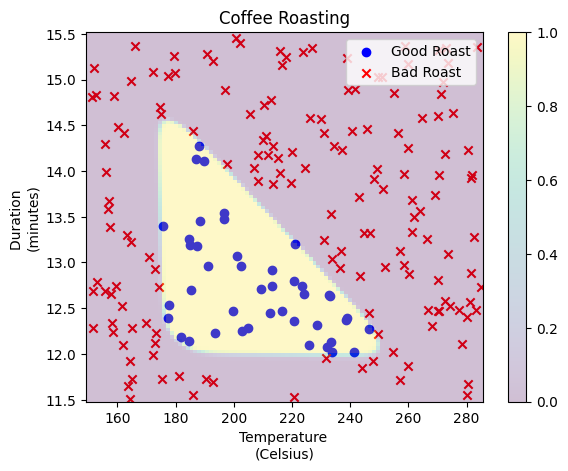

In [7]:
x, y = loadData()
plotPred(x, y)